In [1]:
import sys
sys.path.append("..")
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from evaluate import IoU_value
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from interpret import show
from interpret.blackbox import LimeTabular
from interpret.blackbox import ShapKernel
import pandas as pd
import numpy as np
import xgboost
from interpret.glassbox import ExplainableBoostingClassifier
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("../train/true_dataset/lending club/lending_club_processed.csv",index_col=0)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,15000.0,15000.0,15000.0,60.0,5.32,451.73,0.0,0.0,10.0,0.0,105000.0,1.0,1.0,26,14.24,0.0,775.0,779.0,0.0,34.224381,10.0,0.0,13367.0,38.9,20.0,0.0,0.00,0.00,15838.304347,15838.30,15000.00,838.30,0.0,0.0,0.0,719.0,715.0,0.0,0.0,0.0,0.0,60303.0,1.0,4.0,3.0,3.0,5.0,37177.0,87.0,0.0,1.0,7277.0,66.0,34400.0,0.0,0.0,0.0,4.0,6030.0,15033.0,47.1,0.0,0.0,142.0,210.0,22.0,5.0,2.0,22.0,6.522204,0.0,3.0,3.0,3.0,4.0,11.0,5.0,7.0,3.0,10.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,155369.0,50544.0,28400.0,42806.0,0.0,0.0,0.0
1,4800.0,4800.0,4800.0,60.0,7.99,150.40,0.0,4.0,10.0,2.0,110000.0,2.0,2.0,6,16.29,0.0,790.0,794.0,2.0,34.224381,11.0,0.0,46669.0,42.4,30.0,0.0,1729.75,1729.75,3607.470000,3607.47,3070.25,537.22,0.0,0.0,0.0,649.0,645.0,0.0,0.0,0.0,0.0,316154.0,0.0,3.0,0.0,2.0,17.0,21736.0,53.0,2.0,6.0,6676.0,45.0,119000.0,4.0,0.0,4.0,8.0,28741.0,72306.0,16.7,0.0,0.0,63.0,290.0,7.0,7.0,3.0,7.0,5.000000,0.0,4.0,5.0,6.0,16.0,5.0,7.0,22.0,5.0,11.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,509315.0,68405.0,85000.0,40715.0,0.0,0.0,1.0
2,15000.0,15000.0,15000.0,60.0,10.49,487.47,1.0,11.0,10.0,0.0,75000.0,0.0,0.0,35,10.38,0.0,705.0,709.0,0.0,36.000000,9.0,0.0,4289.0,39.0,57.0,1.0,0.00,0.00,17204.184465,17204.18,15000.00,2204.18,0.0,0.0,0.0,694.0,690.0,0.0,0.0,0.0,316.0,83201.0,2.0,3.0,2.0,5.0,2.0,13139.0,76.0,1.0,3.0,2804.0,61.0,11000.0,0.0,1.0,3.0,8.0,10400.0,3496.0,44.5,0.0,0.0,266.0,113.0,4.0,2.0,1.0,4.0,11.000000,1.0,1.0,3.0,1.0,5.0,47.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,3.0,94.7,0.0,0.0,0.0,100922.0,17428.0,6300.0,17371.0,0.0,0.0,0.0
3,3000.0,3000.0,3000.0,60.0,5.32,90.35,0.0,0.0,9.0,0.0,78000.0,2.0,2.0,42,22.11,0.0,770.0,774.0,0.0,57.000000,14.0,0.0,12410.0,20.2,24.0,0.0,0.00,0.00,3035.931710,3035.93,3000.00,35.93,0.0,0.0,0.0,754.0,750.0,0.0,0.0,0.0,0.0,122270.0,1.0,2.0,0.0,1.0,17.0,11256.0,43.0,1.0,2.0,10269.0,24.0,61300.0,0.0,0.0,3.0,3.0,8734.0,48890.0,20.2,0.0,0.0,108.0,155.0,2.0,2.0,4.0,2.0,10.000000,0.0,2.0,2.0,10.0,13.0,4.0,10.0,16.0,2.0,14.0,0.0,0.0,0.0,1.0,95.8,0.0,0.0,0.0,254797.0,23666.0,61300.0,56497.0,0.0,0.0,0.0
4,8000.0,8000.0,8000.0,60.0,13.49,271.45,2.0,21.0,4.0,0.0,55000.0,2.0,3.0,24,9.56,1.0,720.0,724.0,1.0,14.000000,14.0,0.0,20549.0,31.0,25.0,0.0,0.00,0.00,8421.381904,8421.38,8000.00,421.38,0.0,0.0,0.0,694.0,690.0,0.0,0.0,0.0,0.0,113222.0,0.0,2.0,0.0,1.0,22.0,4812.0,65.0,0.0,4.0,10882.0,34.0,66300.0,2.0,0.0,4.0,6.0,8087.0,31851.0,39.2,0.0,0.0,81.0,120.0,13.0,10.0,1.0,13.0,0.000000,0.0,4.0,4.0,7.0,11.0,7.0,11.0,17.0,4.0,14.0,0.0,0.0,0.0,1.0,96.0,14.3,0.0,0.0,163222.0,25361.0,52400.0,7462.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [3]:
df.drop(columns="target",inplace=True)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,15000.0,15000.0,15000.0,60.0,5.32,451.73,0.0,0.0,10.0,0.0,105000.0,1.0,1.0,26,14.24,0.0,775.0,779.0,0.0,34.224381,10.0,0.0,13367.0,38.9,20.0,0.0,0.00,0.00,15838.304347,15838.30,15000.00,838.30,0.0,0.0,0.0,719.0,715.0,0.0,0.0,0.0,0.0,60303.0,1.0,4.0,3.0,3.0,5.0,37177.0,87.0,0.0,1.0,7277.0,66.0,34400.0,0.0,0.0,0.0,4.0,6030.0,15033.0,47.1,0.0,0.0,142.0,210.0,22.0,5.0,2.0,22.0,6.522204,0.0,3.0,3.0,3.0,4.0,11.0,5.0,7.0,3.0,10.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,155369.0,50544.0,28400.0,42806.0,0.0,0.0
1,4800.0,4800.0,4800.0,60.0,7.99,150.40,0.0,4.0,10.0,2.0,110000.0,2.0,2.0,6,16.29,0.0,790.0,794.0,2.0,34.224381,11.0,0.0,46669.0,42.4,30.0,0.0,1729.75,1729.75,3607.470000,3607.47,3070.25,537.22,0.0,0.0,0.0,649.0,645.0,0.0,0.0,0.0,0.0,316154.0,0.0,3.0,0.0,2.0,17.0,21736.0,53.0,2.0,6.0,6676.0,45.0,119000.0,4.0,0.0,4.0,8.0,28741.0,72306.0,16.7,0.0,0.0,63.0,290.0,7.0,7.0,3.0,7.0,5.000000,0.0,4.0,5.0,6.0,16.0,5.0,7.0,22.0,5.0,11.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,509315.0,68405.0,85000.0,40715.0,0.0,0.0
2,15000.0,15000.0,15000.0,60.0,10.49,487.47,1.0,11.0,10.0,0.0,75000.0,0.0,0.0,35,10.38,0.0,705.0,709.0,0.0,36.000000,9.0,0.0,4289.0,39.0,57.0,1.0,0.00,0.00,17204.184465,17204.18,15000.00,2204.18,0.0,0.0,0.0,694.0,690.0,0.0,0.0,0.0,316.0,83201.0,2.0,3.0,2.0,5.0,2.0,13139.0,76.0,1.0,3.0,2804.0,61.0,11000.0,0.0,1.0,3.0,8.0,10400.0,3496.0,44.5,0.0,0.0,266.0,113.0,4.0,2.0,1.0,4.0,11.000000,1.0,1.0,3.0,1.0,5.0,47.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,3.0,94.7,0.0,0.0,0.0,100922.0,17428.0,6300.0,17371.0,0.0,0.0
3,3000.0,3000.0,3000.0,60.0,5.32,90.35,0.0,0.0,9.0,0.0,78000.0,2.0,2.0,42,22.11,0.0,770.0,774.0,0.0,57.000000,14.0,0.0,12410.0,20.2,24.0,0.0,0.00,0.00,3035.931710,3035.93,3000.00,35.93,0.0,0.0,0.0,754.0,750.0,0.0,0.0,0.0,0.0,122270.0,1.0,2.0,0.0,1.0,17.0,11256.0,43.0,1.0,2.0,10269.0,24.0,61300.0,0.0,0.0,3.0,3.0,8734.0,48890.0,20.2,0.0,0.0,108.0,155.0,2.0,2.0,4.0,2.0,10.000000,0.0,2.0,2.0,10.0,13.0,4.0,10.0,16.0,2.0,14.0,0.0,0.0,0.0,1.0,95.8,0.0,0.0,0.0,254797.0,23666.0,61300.0,56497.0,0.0,0.0
4,8000.0,8000.0,8000.0,60.0,13.49,271.45,2.0,21.0,4.0,0.0,55000.0,2.0,3.0,24,9.56,1.0,720.0,724.0,1.0,14.000000,14.0,0.0,20549.0,31.0,25.0,0.0,0.00,0.00,8421.381904,8421.38,8000.00,421.38,0.0,0.0,0.0,694.0,690.0,0.0,0.0,0.0,0.0,113222.0,0.0,2.0,0.0,1.0,22.0,4812.0,65.0,0.0,4.0,10882.0,34.0,66300.0,2.0,0.0,4.0,6.0,8087.0,31851.0,39.2,0.0,0.0,81.0,120.0,13.0,10.0,1.0,13.0,0.000000,0.0,4.0,4.0,7.0,11.0,7.0,11.0,17.0,4.0,14.0,0.0,0.0,0.0,1.0,96.0,14.3,0.0,0.0,163222.0,25361.0,52400.0,7462.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [4]:
#数据集归一化
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = df

## 使用简单的线性组合得到生成Target字段

现阶段单纯判断前10特征的hit准确性

$y = normalize(0.01 \times x["loan \_ amnt"] + 10\times x["int \_ rate"] + 5\times x["emp \_length"])+ 2 \times    x["grade"]+10\times x["home\_ownership"]+ 0.005 \times x["total\_bc\_limit"] + 0.5 \times x["installment"])$

In [5]:
target_list = ["loan_amnt","int_rate","emp_length","grade","home_ownership","total_bc_limit","installment"]
def compare(target_list,list_10):
    set_result = set(target_list) & set(list_10)
    return len(set_result)

In [6]:
def normalize(x):
    x_max = x.max()
    x_min = x.min()
    if x.max() == x.min():
        return x
    else:
        result = (x-x_min)/(x_max-x_min)
        return result

In [7]:
df_norm["target"] = 0.01 * df_norm["loan_amnt"] + 10 * df_norm["int_rate"]+ 5* df_norm["emp_length"]+2*df_norm["grade"]+10*df_norm["home_ownership"]+0.5*df_norm["installment"]+ 0.005*df_norm["total_bc_limit"]#-2*df_norm["mths_since_last_delinq"]#
df_norm["target"] = (normalize(df_norm["target"])>0.4).astype(int)
df_norm["target"].value_counts()

0    53460
1     3634
Name: target, dtype: int64

In [8]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_res, y_res = smo.fit_resample(X_train, y_train)

In [10]:
xgb_clf = xgboost.XGBClassifier()  #线性情况下不用SMOTE模型精确度反而更好
#xgb_lcf = xgboost.XGBRegressor()
xgb_clf.fit(X_train,y_train)
#xgb_clf.fit(X_res,y_res)
xgb_clf.score(X_test,y_test)

/root/anaconda3/envs/interpret/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9955630801564598

### 使用LIME局部解释查看效果 结果：选取的3个特征在5个随机选定样本中的平均hit数为3

In [ ]:
lime = LimeTabular(predict_fn=xgb_clf.predict_proba, data=X_train)  
lime_local = lime.explain_local(X_test, y_test)  #解释第0-5样本
#show(lime_local)

In [ ]:
count = 0
for i in range(X_test.shape[0]):
    count += compare(target_list,lime_local._internal_obj["specific"][i]["names"])
    print(lime_local._internal_obj["specific"][i]["names"])
count /= X_test.shape[0]
count

In [ ]:
def extract_from_exp(exp,columns):
    exp_local = exp.local_exp[1]
    result_list = []
    for i in range(len(exp_local)):
        result_list.append(columns[exp_local[i][0]])
    return result_list
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns)
count = 0
for i in range(X_test.shape[0]):
    exp = explainer.explain_instance(X_test.iloc[i], xgb_clf.predict_proba, num_features=10)
    result_list = extract_from_exp(exp,X_train.columns)
    count += compare(target_list,result_list)
count /= X_test.shape[0]
#show(lime_local)

In [114]:
exp.local_exp[1]

[(39, -0.05999971989457629),
 (5, -0.03257017736444564),
 (90, -0.026731804139571387),
 (62, -0.025556417903239852),
 (81, 0.015063313172601862),
 (30, -0.014263970713046139),
 (87, 0.011582197847462365),
 (31, -0.010723847267593001),
 (78, -0.009946290904418892),
 (27, 0.009171191572112958)]

### 使用SHAP局部解释查看效果 7个特征在测试集中平均hit数为5.54

In [ ]:
'''
shap = ShapKernel(predict_fn=xgb_clf.predict_proba, data=X_train.iloc[:8000],n_jobs=15)  # 多进程用多了内存容易爆
shap_local = shap.explain_local(X_test[:5], y_test[:5])
show(shap_local)
''' #interpretml的可视化会消耗大量时间

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_clf)
#explainer  = shap.Explainer(xgb_clf)
shap_values = explainer.shap_values(X_test)  # 传入特征矩阵X，计算SHAP值

In [ ]:
count = 0
for i in range(len(shap_values)):
    shap_val = shap_values[i]
    df_row = pd.DataFrame(np.array(shap_val).reshape(1,-1),columns = X_train.columns)
    df_new = df_row.copy().abs()

    df_new = df_new.sort_values(by =0,axis = 1,ascending = False).iloc[:,:10]
    count += compare(target_list,df_new.columns)
count = count / len(shap_values)
count

In [ ]:
def plot_sorted_value(shap_values,columns,numberth):
    #plt.rcParams['font.sans-serif'] = ['SimHei']
    #plt.rcParams['axes.unicode_minus'] = False
    shap_val = shap_values[numberth,:]
    df_row = pd.DataFrame(np.array(shap_val).reshape(1,-1),columns = columns)
    df_new = df_row.copy().abs()

    df_new = df_new.sort_values(by =0,axis = 1,ascending = False).iloc[:,:10]
    #print(type(df_row[df_new.columns].values[0]))
    plt.barh(np.flipud(df_new.columns),np.flipud(df_row[df_new.columns].values[0]))
    plt.xticks(rotation=90)
fig = plt.figure(figsize =(20,15))
pic_num = 11
for i in range(pic_num):
    ax = fig.add_subplot(int(pic_num/2) if pic_num%2==0 else int(pic_num/2) +1,2,i+1)
    plot_sorted_value(shap_values,X_train.columns,i)

### 使用EBMBoosting解释 3个特征在5个随机样本的平均hit数为3 但是EBMBoosting解释会产生特征交互

In [11]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)
ebm_local = ebm.explain_local(X_test.iloc[:5], y_test.iloc[:5])
show(ebm_local)

### 线性生成Label结果图

$y = normalize(0.01 \times x["loan \_ amnt"] + 10\times x["int \_ rate"] + 5\times x["emp \_length"])$

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


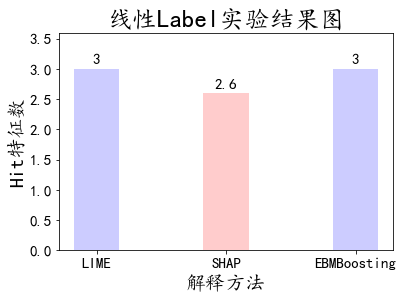

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
name_list = ['LIME','SHAP','EBMBoosting']
num_list = [3,2.6,3]
for a, b in zip(name_list, num_list):
    ax.text(a, b+0.05, b, ha='center', va='bottom',size = 15)
b = ax.bar(name_list, num_list,width = 0.35,color = 'br',alpha = 0.2)
#ax.text(1, 3.5, r"$y = normalize(0.01 \times x[\"loan \_ amnt\"] + 10\times x[\"int \_ rate\"] + 5\times x[\"emp \_length\"])$",fontsize=20)
#plt.bar(range(len(num_list)), num_list,color='rbg',tick_label=name_list)
plt.title('线性Label实验结果图',size = 25)
plt.xlabel('解释方法',size = 20)
plt.ylabel('Hit特征数',size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylim(0,3.6)
plt.rcParams['figure.figsize'] = (10,7)

## 使用一定的非线性生成label

$y = normalize( \sqrt{x["loan \_ amnt"]} + \frac{10}{x["int \_ rate"]+\epsilon} +4\times x["sub \_ grade"] + x["emp \_length"]^2)$

In [13]:
df_norm["target"] = np.sqrt(df_norm["loan_amnt"]) + 10 /(df_norm["int_rate"]+0.0001)+ df_norm["emp_length"]*df_norm["emp_length"]+4*df_norm["sub_grade"]
df_norm["target"] = (normalize(df_norm["target"])>0.4).astype(int)
df_norm["target"].value_counts()

0    29019
1    28075
Name: target, dtype: int64

In [14]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
xgb_clf = xgboost.XGBClassifier()
#xgb_lcf = xgboost.XGBRegressor()
xgb_clf.fit(X_train,y_train)

xgb_clf.score(X_test,y_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:30:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9969642127386303

### 使用LIME解释  4个特征在随机选取的5个样本中的平局hit数为3.2

In [15]:
lime = LimeTabular(predict_fn=xgb_clf.predict_proba, data=X_train)
lime_local = lime.explain_local(X_test.iloc[:5], y_test.iloc[:5])

show(lime_local)

### 使用SHAP解释 4个特征在随机选取的5个样本中的平局hit数为3.2

In [16]:
shap = ShapKernel(predict_fn=xgb_clf.predict_proba, data=X_train.iloc[:8000],n_jobs=15)  # 多进程用多了内存容易爆
shap_local = shap.explain_local(X_test[:5], y_test[:5])
show(shap_local)

Using 8000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/5 [00:00<?, ?it/s]

### EBMBoosting 4个特征在随机选取的5个样本中的平局hit数为4

In [17]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)
ebm_local = ebm.explain_local(X_test.iloc[:5], y_test.iloc[:5])
show(ebm_local)

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


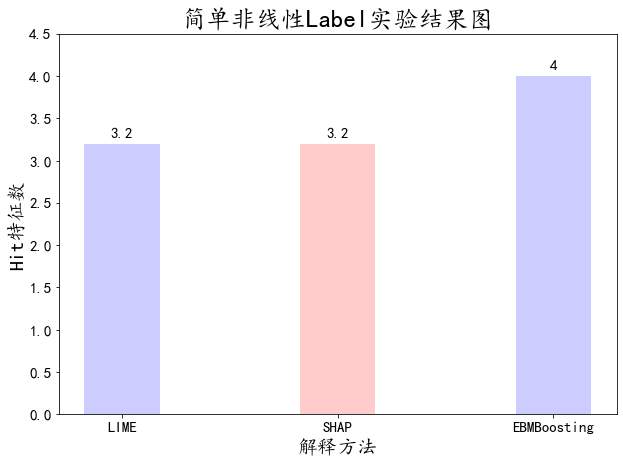

In [18]:
fig, ax = plt.subplots()
name_list = ['LIME','SHAP','EBMBoosting']
num_list = [3.2,3.2,4]
for a, b in zip(name_list, num_list):
    ax.text(a, b+0.05, b, ha='center', va='bottom',size = 15)
b = ax.bar(name_list, num_list,width = 0.35,color = 'br',alpha = 0.2)
#ax.text(1, 3.5, r"$y = normalize(0.01 \times x[\"loan \_ amnt\"] + 10\times x[\"int \_ rate\"] + 5\times x[\"emp \_length\"])$",fontsize=20)
#plt.bar(range(len(num_list)), num_list,color='rbg',tick_label=name_list)
plt.title('简单非线性Label实验结果图',size = 25)
plt.xlabel('解释方法',size = 20)
plt.ylabel('Hit特征数',size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylim(0,4.5)
plt.rcParams['figure.figsize'] = (10,7)

## 交互特征暂时不加入考虑范围